# Simple Models for Glacial Cycles

The goal of this notebook is to demonstrate a few of the classic models for glacial-interglacial cycles. Each model is forced by real insolation data and simulates the total ice volume contained in ice sheets.

This notebook was written by Prof. Alex Robel at Georgia Tech and was last modified on Jan. 8, 2021. Insolation data comes from Eli Tziperman's EPS 231 course. The LR04 stack data is from [Liesicki and Raymo (2005)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2004PA001071).

In [7]:
# import the packages we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [8]:
#load in insolation data
mil = np.loadtxt('Milankovitch.dat')
time = mil[:,0]
ins = mil[:,2]

#load in LR04 stack for comparison
LR04 = np.loadtxt('LR04stack.txt', skiprows=5)
LR04_time = -LR04[:,0]
LR04_V_dm = LR04[:,1]-np.mean(LR04[:,1])

In [9]:
#normalize insolation data
ins_dm = ins - np.mean(ins) #remove mean
ins_dm_norm = ins_dm/(np.max(ins_dm)-np.min(ins_dm)) #normalize by range
ins_dm_vnorm = ins_dm_norm*5 #something extra for scaling

## Calder Model (1974)

In [10]:
#set parameters
dt = 1e3 #time step length
nt = 2000 #number of time steps (to match with insolation input data)
V = np.zeros([nt+1]) #pre-allocate volume vector
V[0] = 0 #initial condition for volume

i0 = 502   
km = 0.55e-5
ka = 0.22e-5

In [11]:
#use loop to step model through time
for t in range(nt):
    if ins[t]>i0:
        k = km
    else:
        k = ka
    
    dVdt = -k*(ins[t]-i0) #calculate RHS of model
    
    V[t+1] = V[t] + dVdt*dt #advance model one step using a forward-euler ODE approximation

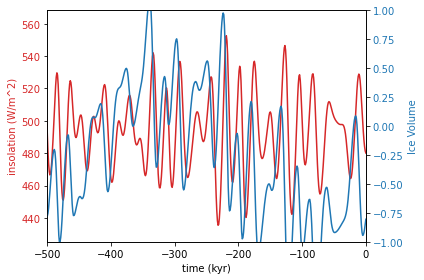

In [12]:
#plot model output and compare to insolation forcing
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (kyr)')
ax1.set_ylabel('insolation (W/m^2)', color=color)
ax1.plot(time/1e3, ins, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Ice Volume', color=color)  # we already handled the x-label with ax1
ax2.plot(time/1e3, V-np.mean(V) , color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(-1,1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xlim(-500,0)
plt.show()

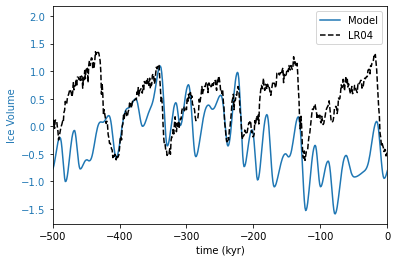

In [13]:
#plot model output and compare to LR04 stack
fig, ax1 = plt.subplots()

ax1.set_ylabel('Ice Volume', color=color)  # we already handled the x-label with ax1
ax1.plot(time/1e3, V-np.mean(V) , color=color)
ax1.plot(LR04_time, LR04_V_dm , 'k--')
ax1.tick_params(axis='y', labelcolor=color)
plt.xlim(-500,0)
ax1.set_xlabel('time (kyr)')
ax1.legend(['Model','LR04'])
plt.show()

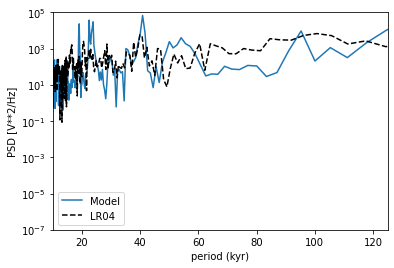

In [15]:
#calculate and plot periodogram for model
f, Pxx_den = signal.periodogram(V, 1/(time[1]-time[0]))
plt.semilogy(1/f[1:-1]/1e3, Pxx_den[1:-1])

#calculate and plot periodogram for LR04
f2, Pxx_den2 = signal.periodogram(LR04_V_dm, 1/(LR04_time[0]-LR04_time[1]))
plt.semilogy(1/f2[1:-1], 5e2*Pxx_den2[1:-1], 'k--')

plt.ylim([1e-7, 10e4])
plt.xlim([10, 125])
plt.xlabel('period (kyr)')
plt.ylabel('PSD [V**2/Hz]')
plt.legend(['Model','LR04'])
plt.show()

## Imbrie and Imbrie Model (1980)

In [9]:
#set parameters
dt = 1e3 #time step length
nt = 2000 #number of time steps (to match with insolation input data)
V = np.zeros([nt+1]) #pre-allocate volume vector
V[0] = 0 #initial condition for volume

taum = 42000   
taua = 10000

In [10]:
#use loop to step model through time
for t in range(nt):
    if V[t]>ins_dm_norm[t]:
        tau = taum
    else:
        tau = taua
    
    dVdt = (ins_dm_norm[t]-V[t])/tau #calculate RHS of model
    
    V[t+1] = V[t] + dVdt*dt #advance model one step using a forward-euler ODE approximation

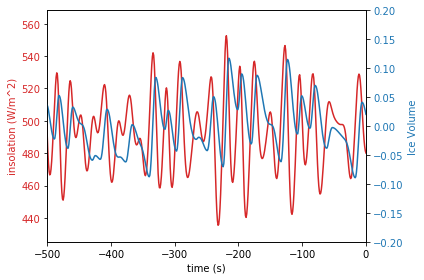

In [11]:
#plot model output and compare to insolation forcing
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('insolation (W/m^2)', color=color)
ax1.plot(time/1e3, ins, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Ice Volume', color=color)  # we already handled the x-label with ax1
ax2.plot(time/1e3, V-np.mean(V) , color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(-0.2,0.2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xlim(-500,0)
plt.show()

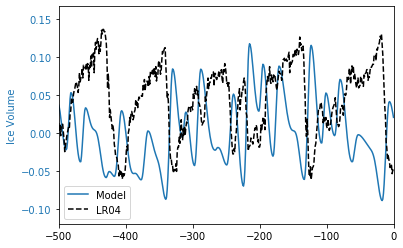

In [12]:
#plot model output and compare to LR04 stack
fig, ax1 = plt.subplots()

ax1.set_ylabel('Ice Volume', color=color)  # we already handled the x-label with ax1
ax1.plot(time/1e3, V-np.mean(V) , color=color)
ax1.plot(LR04_time, LR04_V_dm/10 , 'k--')
ax1.tick_params(axis='y', labelcolor=color)
plt.xlim(-500,0)
ax1.legend(['Model','LR04'])
plt.show()

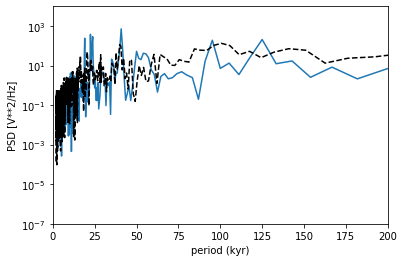

In [13]:
#calculate and plot periodogram for model
f, Pxx_den = signal.periodogram(V, 1/(time[1]-time[0]))
plt.semilogy(1/f[1:-1]/1e3, Pxx_den[1:-1])

#calculate and plot periodogram for LR04
f2, Pxx_den2 = signal.periodogram(LR04_V_dm, 1/(LR04_time[0]-LR04_time[1]))
plt.semilogy(1/f2[1:-1], 1e1*Pxx_den2[1:-1], 'k--')

plt.ylim([1e-7, 1e4])
plt.xlim([0, 2e2])
plt.xlabel('period (kyr)')
plt.ylabel('PSD [V**2/Hz]')
plt.legend(['Model','LR04'])
plt.show()

## Paillard Model (2001)

In [14]:
#shorten insolation forcing
ins_dm_vnorm2 = ins_dm_vnorm[1008:-1]
time2 = time[1008:-1]

#set parameters
dt = 1e3 #time step length
nt = np.size(ins_dm_vnorm2) #number of time steps (to match with insolation input data)
V = np.zeros([nt+1]) #pre-allocate volume vector
V[0] = 0 #initial cond|ition for volume

taug = 50000
tauf = 25000
taui = 10000
i0 = -0.75
i1 = 0
Vmax = 1
st = 3; #st=1 is full glacial, st=2 is mild glacial, st=3 is interglacial
Vr = 1
taur=taug

In [15]:
#use loop to step model through time
for t in range(nt):
    if ins_dm_vnorm2[t]<i0 and st==3:
        Vr = 1
        taur = taug
        st = 1
    elif V[t]>Vmax and st==1:
        Vr = 1
        taur = taug
        st = 2
    elif ins_dm_vnorm2[t]>i1 and st==2:
        Vr = 0
        taur = taui
        st = 3    

    dVdt = (Vr-V[t])/taur - ins_dm_vnorm2[t]/tauf #calculate RHS of model
    
    V[t+1] = V[t] + dVdt*dt #advance model one step using a forward-euler ODE approximation

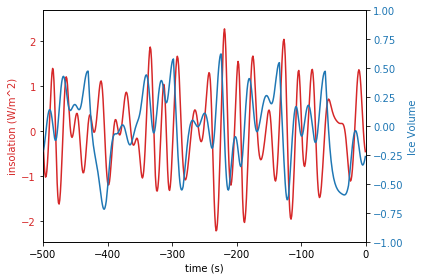

In [16]:
#plot model output and compare to insolation forcing
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('insolation (W/m^2)', color=color)
ax1.plot(time2/1e3, ins_dm_vnorm2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Ice Volume', color=color)  # we already handled the x-label with ax1
ax2.plot(time2/1e3, V[0:-1]-np.mean(V) , color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(-1,1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xlim(-500,0)
plt.show()

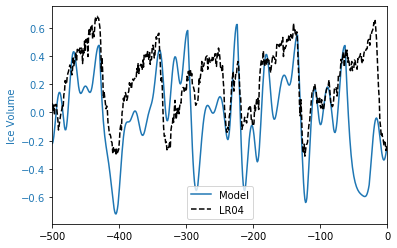

In [17]:
#plot model output and compare to LR04 stack
fig, ax1 = plt.subplots()

ax1.set_ylabel('Ice Volume', color=color)  # we already handled the x-label with ax1
ax1.plot(time2/1e3, V[0:-1]-np.mean(V) , color=color)
ax1.plot(LR04_time, LR04_V_dm/2 , 'k--')
ax1.tick_params(axis='y', labelcolor=color)
plt.xlim(-500,0)
ax1.legend(['Model','LR04'])
plt.show()

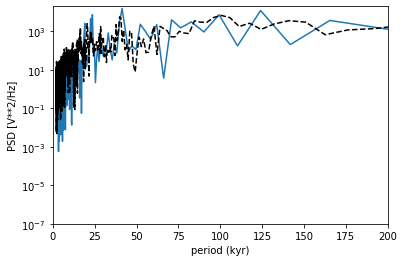

In [18]:
#calculate and plot periodogram for model
f, Pxx_den = signal.periodogram(V, 1/(time2[1]-time2[0]))
plt.semilogy(1/f[1:-1]/1e3, Pxx_den[1:-1])

#calculate and plot periodogram for LR04
f2, Pxx_den2 = signal.periodogram(LR04_V_dm, 1/(LR04_time[0]-LR04_time[1]))
plt.semilogy(1/f2[1:-1], 5e2*Pxx_den2[1:-1], 'k--')

plt.ylim([1e-7, 2e4])
plt.xlim([0, 2e2])
plt.xlabel('period (kyr)')
plt.ylabel('PSD [V**2/Hz]')
plt.legend(['Model','LR04'])
plt.show()